### Задание 2. 
### Задание на ознакомление с датасетом  — сделать описательную статистику нескольких переменных на выбор, выяснить возможный источник выбранных признаков и взаимосвязь с целевой переменной.

In [1]:
!pip install phik -q
!pip install association-metrics -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#import association_metrics as am

In [4]:
#pip install --upgrade pandas

In [5]:
#conda install -c conda-forge seaborn=0.12.2

### Загрузка данных.

In [6]:
PATH_clinical = 'C:/Ангелина/Data Sience/6 четверть/Введение в анализ данных в медицине/2/clinical.tsv'
PATH_exposure = 'C:/Ангелина/Data Sience/6 четверть/Введение в анализ данных в медицине/2/exposure.tsv'
PATH_family_history = 'C:/Ангелина/Data Sience/6 четверть/Введение в анализ данных в медицине/2/family_history.tsv'
PATH_follow_up = 'C:/Ангелина/Data Sience/6 четверть/Введение в анализ данных в медицине/2/follow_up.tsv'
PATH_pathology_detail = 'C:/Ангелина/Data Sience/6 четверть/Введение в анализ данных в медицине/2/pathology_detail.tsv'

### Датасет clinical

In [7]:
df_clinical = pd.read_table(PATH_clinical)
df_clinical.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [8]:
df_clinical.shape

(106, 158)

In [9]:
print('Есть пропуски!\n') if df_clinical.isna().any().any() else print('Пропусков нет\n')

Пропусков нет



### Датасет exposure

In [10]:
df_exposure = pd.read_table(PATH_exposure)
df_exposure.head()

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [11]:
df_exposure.shape

(48, 35)

In [12]:
print('Есть пропуски!\n') if df_exposure.isna().any().any() else print('Пропусков нет\n')

Пропусков нет



### Датасет family_history

In [13]:
df_family_history = pd.read_table(PATH_family_history)
df_family_history.head()

,case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_with_cancer_history,relatives_with_cancer_history_count


In [14]:
df_family_history.shape  #пустой датасет

(0, 9)

In [15]:
print('Есть пропуски!\n') if df_family_history.isna().any().any() else print('Пропусков нет\n')

Пропусков нет



### Датасет follow_up

In [16]:
df_follow_up = pd.read_table(PATH_follow_up)
df_follow_up.head()

,case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,...,second_gene_symbol,specialized_molecular_test,test_analyte_type,test_result,test_units,test_value,transcript,variant_origin,variant_type,zygosity


In [17]:
df_follow_up.shape #датасет пустой

(0, 112)

In [18]:
print('Есть пропуски!\n') if df_follow_up.isna().any().any() else print('Пропусков нет\n')

Пропусков нет



### Датасет pathology_detail

In [19]:
df_pathology_detail = pd.read_table(PATH_pathology_detail)
df_pathology_detail.head()

,case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,...,rhabdoid_percent,rhabdoid_present,sarcomatoid_percent,sarcomatoid_present,size_extraocular_nodule,transglottic_extension,tumor_largest_dimension_diameter,tumor_thickness,vascular_invasion_present,vascular_invasion_type


In [20]:
df_pathology_detail.shape # датасет пустой

(0, 51)

In [21]:
print('Есть пропуски!\n') if df_pathology_detail.isna().any().any() else print('Пропусков нет\n')

Пропусков нет



### Три датасета пустые. Работаем с таблицами df_clinical и df_exposure

In [22]:
display(df_clinical.nunique())

case_id                  58
case_submitter_id        58
project_id                1
age_at_index             35
age_is_obfuscated         1
                         ..
treatment_frequency       1
treatment_intent_type     1
treatment_or_therapy      4
treatment_outcome         1
treatment_type            3
Length: 158, dtype: int64

In [23]:
display(df_exposure.nunique())

case_id                                   48
case_submitter_id                         48
project_id                                 1
age_at_onset                               1
alcohol_days_per_week                      1
alcohol_drinks_per_day                     1
alcohol_history                            1
alcohol_intensity                          1
alcohol_type                               1
asbestos_exposure                          1
bmi                                        1
cigarettes_per_day                         1
coal_dust_exposure                         1
environmental_tobacco_smoke_exposure       1
exposure_duration                          1
exposure_duration_years                    1
exposure_type                              1
height                                     1
marijuana_use_per_week                     1
pack_years_smoked                          1
parent_with_radiation_exposure             1
radon_exposure                             1
respirable

### Убираем из датасетов df_clinical и df_exposure пустые значения и колонки, где количество уникальных значений = 1.

In [24]:
clinical_info_lst = [i for i in df_clinical.columns if df_clinical[i].nunique() != 1]
clinical_info = df_clinical[clinical_info_lst]

In [25]:
clinical_info.head()

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,yes,"Pharmaceutical Therapy, NOS"


In [26]:
exposure_info_lst = [i for i in df_exposure.columns if df_exposure[i].nunique() != 1]
exposure_info = df_exposure[exposure_info_lst]

In [27]:
exposure_info.head()

,case_id,case_submitter_id
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4
3,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062
4,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB


### Таблица exposure_info полностью дублирует первые две колонки таблицы clinical_info.
### Работаем с датасетом clinical_info.

Получим однообразие данных.

In [28]:
clinical_info = clinical_info.replace("no", 'No')
clinical_info = clinical_info.replace("yes", 'Yes')
clinical_info = clinical_info.replace("'--", np.nan)
clinical_info.head()

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,Yes,"Pharmaceutical Therapy, NOS"


In [29]:
clinical_info.treatment_type.unique()

array(['Pharmaceutical Therapy, NOS', 'Radiation Therapy, NOS', nan],
      dtype=object)

In [30]:
# добавим два столбца
clinical_info['treatment_Radiation'] = np.nan
clinical_info['treatment_Pharmaceutical'] = np.nan

In [31]:
clinical_info.head()

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type,treatment_Radiation,treatment_Pharmaceutical
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,Yes,"Pharmaceutical Therapy, NOS",NaN,NaN
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,"Radiation Therapy, NOS",NaN,NaN
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,"Radiation Therapy, NOS",NaN,NaN
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,Yes,"Pharmaceutical Therapy, NOS",NaN,NaN
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,Yes,"Pharmaceutical Therapy, NOS",NaN,NaN


In [32]:
# записываем новые столбцы на основе старых 
def therapy_reaction(row):
    if row['treatment_type'] == 'Pharmaceutical Therapy, NOS':
        row['treatment_Pharmaceutical'] = row['treatment_or_therapy']
    elif row['treatment_type'] == 'Radiation Therapy, NOS':
        row['treatment_Radiation'] = row['treatment_or_therapy']

    return row

clinical_info = clinical_info.apply(therapy_reaction, axis=1)

In [33]:
# удалим неинформативные столбцы
clinical_info = clinical_info.drop(['treatment_or_therapy',	'treatment_type', 'case_submitter_id'], axis=1)

In [34]:
clinical_info.shape

(106, 31)

In [35]:
clinical_info.set_index('case_id', inplace=True)
clinical_info.dropna(axis=0, how='all', inplace=True)
clinical_info.reset_index(drop=False, inplace=True )
clinical_info.shape

(96, 31)

In [36]:
for i in range(0, len(clinical_info)):
    if i % 2 == 0:
        clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']] = clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']].fillna(clinical_info.loc[i+1][['treatment_Radiation', 'treatment_Pharmaceutical']])

In [37]:
clinical_info # очищенный датасет

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,NaN,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,NaN,Yes
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,NaN,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,NaN
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,NaN
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,NaN,Yes
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,f8cf647b-1447-4ac3-8c43-bef07765cabf,52,-19238,NaN,not hispanic or latino,male,white,Alive,1957,NaN,...,No,No,not reported,Specified parts of peritoneum,No,Specified parts of peritoneum,not reported,2009,No,NaN
92,f978cb0f-d319-4c01-b4c5-23ae1403a106,38,-13996,NaN,not hispanic or latino,female,asian,Alive,1973,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,No,NaN
93,f978cb0f-d319-4c01-b4c5-23ae1403a106,38,-13996,NaN,not hispanic or latino,female,asian,Alive,1973,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,NaN,Yes
94,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,77,-28474,NaN,hispanic or latino,female,white,Alive,1928,NaN,...,No,No,not reported,Lymph nodes of inguinal region or leg,No,Lymph nodes of inguinal region or leg,not reported,2005,No,NaN


## EDA

In [38]:
# удаление колонок с одним значением во всех строках
clinical_info_lst = [i for i in clinical_info.columns if clinical_info[i].nunique() != 1]
clinical_info = clinical_info[clinical_info_lst]

In [39]:
clinical_info.describe()

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
count,96,96,96,18,96,96,96,96,96,10,...,84,92,86,96,96,96,96,96,48,48
unique,48,34,48,9,2,2,3,2,34,4,...,4,2,41,10,2,20,20,14,3,3
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,67,-22454,248,not hispanic or latino,female,white,Alive,1943,2012,...,Stage II,No,132,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,No,Yes
freq,2,6,2,2,72,52,58,78,6,4,...,34,50,4,76,94,32,32,18,40,44


In [40]:
# разделяем признаки по типам
clinical_info.columns

Index(['case_id', 'age_at_index', 'days_to_birth', 'days_to_death',
       'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth',
       'year_of_death', 'age_at_diagnosis', 'ann_arbor_b_symptoms',
       'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement',
       'days_to_last_follow_up', 'icd_10_code', 'prior_treatment',
       'site_of_resection_or_biopsy', 'tissue_or_organ_of_origin',
       'year_of_diagnosis', 'treatment_Radiation', 'treatment_Pharmaceutical'],
      dtype='object')

In [41]:
# неинформативные признаки: days_to_diagnosis,last_known_disease_status,morphology,primary_diagnosis,
# prior_malignancy, progression_or_recurrence, synchronous_malignancy,tumor_grade

In [42]:

continuous_features = ['age_at_index', 'days_to_birth', 'days_to_death',
                       'year_of_birth', 'year_of_death', 'age_at_diagnosis',
                       'days_to_last_follow_up', 'year_of_diagnosis']

categorical_features = [i for i in clinical_info.columns if i not in continuous_features]

In [43]:
# числовые признаки приведём к типу float, категориальные - к category
for i in continuous_features:
    clinical_info[i] = clinical_info[i].astype('float')

for i in categorical_features:
    clinical_info[i] = clinical_info[i].astype('category')

## Числовые признаки

In [44]:
clinical_info[continuous_features].describe()

,age_at_index,days_to_birth,days_to_death,year_of_birth,year_of_death,age_at_diagnosis,days_to_last_follow_up,year_of_diagnosis
count,96.000000,96.000000,18.000000,96.000000,10.00000,96.000000,86.000000,96.000000
mean,56.270833,-20731.354167,1504.777778,1952.875000,2007.60000,20731.354167,1274.372093,2009.145833
std,13.874231,5080.518956,2065.507759,15.092173,4.64758,5080.518956,1307.703277,5.005217
min,23.000000,-30256.000000,58.000000,1923.000000,2001.00000,8493.000000,0.000000,1987.000000
25%,46.000000,-24607.750000,313.000000,1941.000000,2004.00000,16998.250000,434.250000,2009.000000
50%,57.500000,-21146.500000,595.000000,1951.500000,2009.00000,21146.500000,832.000000,2011.000000
75%,67.000000,-16998.250000,1252.000000,1963.250000,2012.00000,24607.750000,1581.000000,2012.000000
max,82.000000,-8493.000000,6425.000000,1987.000000,2012.00000,30256.000000,5980.000000,2013.000000


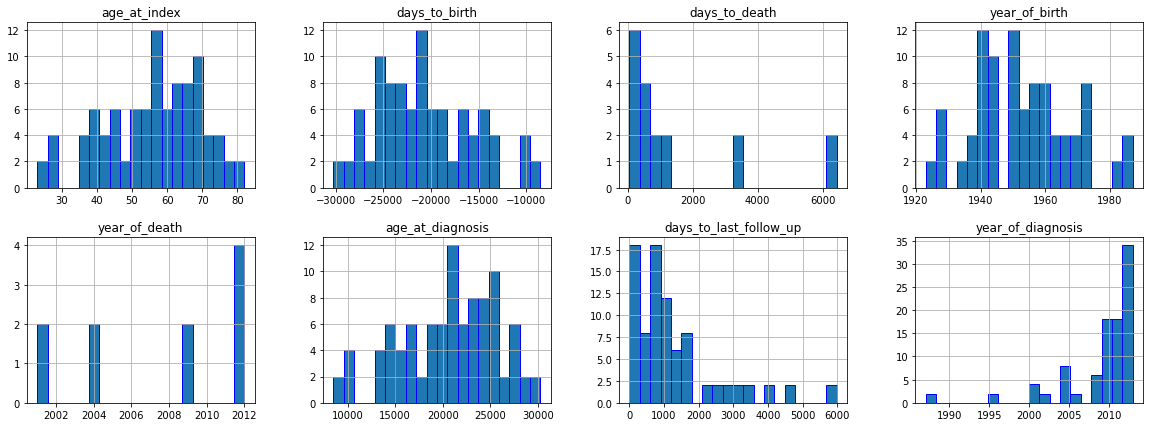

In [45]:
clinical_info[continuous_features].hist(layout=(-1, 4), figsize=(20, 7), bins=20, edgecolor='b');

## Вероятно, что целевая переменная - vital_status (человек жив или мертв)

### age_at_index (возраст, в котором пациент попал в базу)

Text(0.5, 0, 'age_at_index')

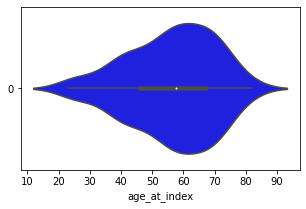

In [46]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['age_at_index'], orient='h', color='b')
plt.xlabel('age_at_index')

выбросов не наблюдается, распределение нормальное

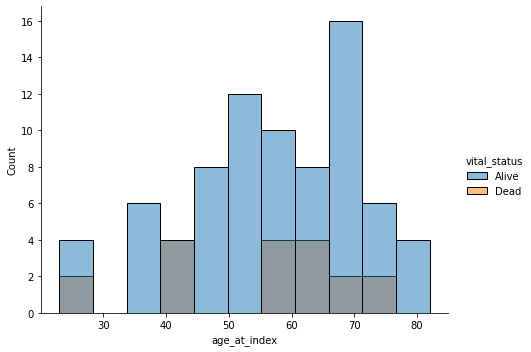

In [47]:
sns.displot(data=clinical_info,
            x=clinical_info['age_at_index'],
            legend=True,
            aspect=1.3,
            bins=11,
            hue=clinical_info['vital_status'],
            kind='hist')

### days_to_birth (возраст в днях до момента постановки диагноза, отрицательная величина)

Text(0.5, 0, 'days_to_birth')

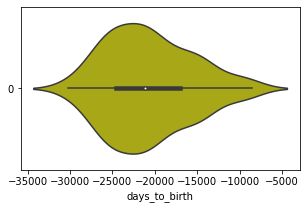

In [48]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['days_to_birth'], orient='h', color='y')
plt.xlabel('days_to_birth')

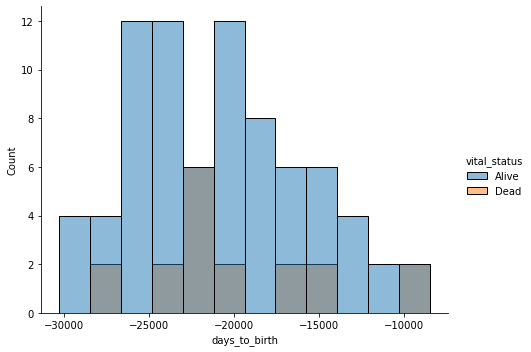

In [49]:
sns.displot(data=clinical_info,
            x=clinical_info['days_to_birth'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info['vital_status'],
            kind='hist')

In [50]:
print(f'\033[1mКоэффициент корреляции\033[0m  = ', round(np.corrcoef(clinical_info['days_to_birth'], clinical_info['age_at_index'])[0][1], 5))

Коэффициент корреляции  =  -0.99984


Коэффициент корреляции высокий. Можно одним признаком пренебречь, при обучении модели.

## days_to_death (количество дней до смерти)

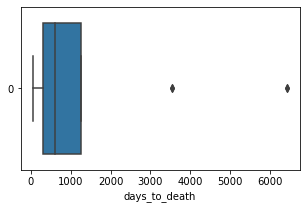

In [51]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['days_to_death'], orient='h')
plt.xlabel('days_to_death');

Наблюдается два выброса.

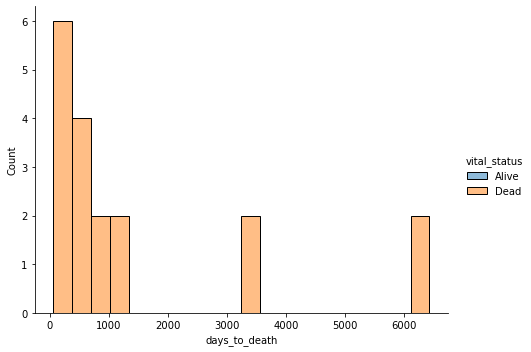

In [52]:
sns.displot(data=clinical_info,
            x=clinical_info['days_to_death'],
            legend=True,
            aspect=1.3,
            bins=20,
            hue=clinical_info['vital_status'],
            kind='hist')

Признак отражает только умерших. Ошибочных данных нет.

In [53]:
clinical_info[(clinical_info['vital_status'] == 'Dead') & (clinical_info['days_to_death'] > 3000)]

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
28,3f5a897d-1eaa-4d4c-8324-27ac07c90927,58.0,-21272.0,6425.0,not hispanic or latino,male,white,Dead,1929.0,2004.0,...,NaN,Yes,NaN,C83.3,Yes,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,1987.0,No,NaN
29,3f5a897d-1eaa-4d4c-8324-27ac07c90927,58.0,-21272.0,6425.0,not hispanic or latino,male,white,Dead,1929.0,2004.0,...,NaN,Yes,NaN,C83.3,Yes,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,1987.0,NaN,Yes
50,a468e725-ad4b-411d-ac5c-2eacc68ec580,67.0,-24661.0,3553.0,not hispanic or latino,male,white,Dead,1935.0,NaN,...,Stage III,No,3227.0,C77.1,No,Intrathoracic lymph nodes,Intrathoracic lymph nodes,2002.0,NaN,Yes
51,a468e725-ad4b-411d-ac5c-2eacc68ec580,67.0,-24661.0,3553.0,not hispanic or latino,male,white,Dead,1935.0,NaN,...,Stage III,No,3227.0,C77.1,No,Intrathoracic lymph nodes,Intrathoracic lymph nodes,2002.0,No,NaN


Два человека с очень большим количеством дней до сметри (17 лет и 9 лет). Вероятно новообразование удалось купировать или удалить. Но произошел рецидив. Возможно это не выбросы.

Общее: оба мужчины, не было лечения с облучением, только фармацевтикой.

## year_of_birth (год рождения)

Text(0.5, 0, 'year_of_birth')

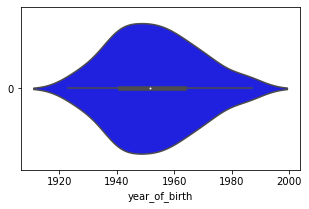

In [54]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['year_of_birth'], orient='h', color='b')
plt.xlabel('year_of_birth')

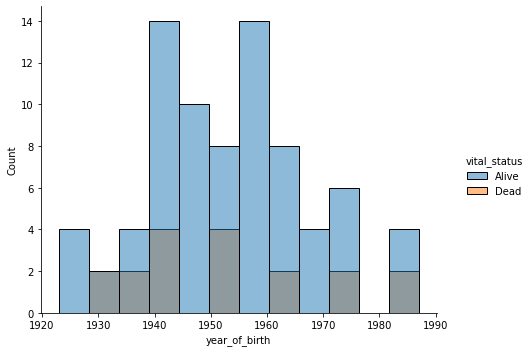

In [55]:
sns.displot(data=clinical_info,
            x=clinical_info['year_of_birth'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info['vital_status'],
            kind='hist')

## year_of_death (год смерти)

Text(0.5, 0, 'year_of_death')

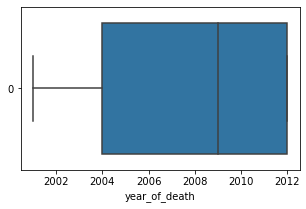

In [56]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['year_of_death'], orient='h')
plt.xlabel('year_of_death');

Text(0.5, 0, 'year_of_death')

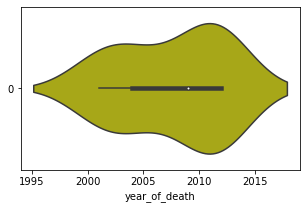

In [57]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['year_of_death'], orient='h', color='y')
plt.xlabel('year_of_death')

## age_at_diagnosis (возраст постановки диагонза в днях)

Text(0.5, 0, 'age_at_diagnosis')

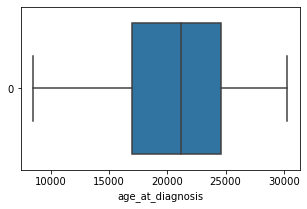

In [58]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['age_at_diagnosis'], orient='h')
plt.xlabel('age_at_diagnosis')

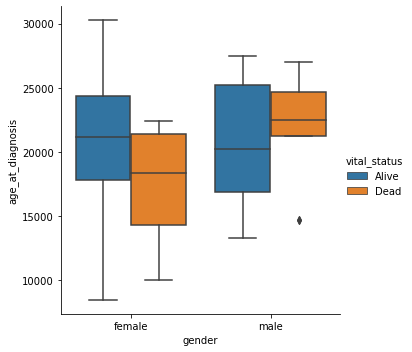

In [59]:
sns.catplot(data=clinical_info,
            x="gender",
            y="age_at_diagnosis",
            hue='vital_status',
            kind="box")

Видно, что женщины, которым поставили диагноз от 40 до 50 лет умирают чаще, чем женщины более старшего возраста. От 50 до 60 шансы 50/50. После 60 - вылечиваются. Вероятно, потому что более молодые не проводят регулярную диагностику, чем женщины преклонного возраста.

У мужчин наоборот, умирают представители за 60 (шансы 50/50). До 60 - вылечиваются.

Женщины заболевают раньше по возрасту.

## days_to_last_follow_up (количество дней от последнего обследования)

Text(0.5, 0, 'days_to_last_follow_up')

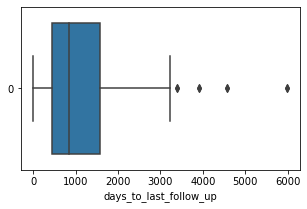

In [60]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['days_to_last_follow_up'], orient='h')
plt.xlabel('days_to_last_follow_up')

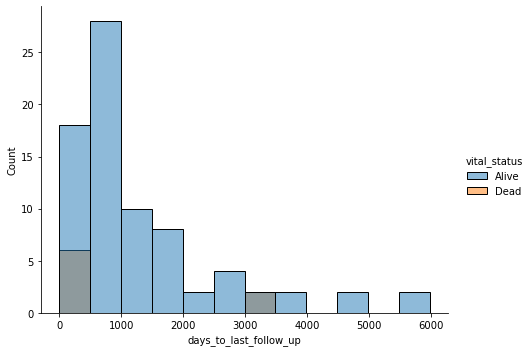

In [61]:
sns.displot(data=clinical_info,
            x=clinical_info['days_to_last_follow_up'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info['vital_status'],
            kind='hist')

## year_of_diagnosis (год постановки диагноза)

Text(0.5, 0, 'year_of_diagnosis')

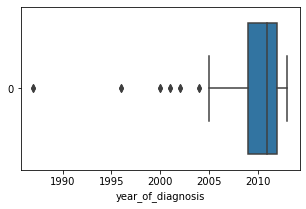

In [62]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['year_of_diagnosis'], orient='h')
plt.xlabel('year_of_diagnosis')

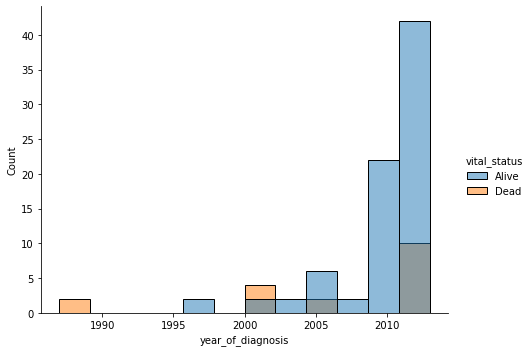

In [63]:
sns.displot(data=clinical_info,
            x=clinical_info['year_of_diagnosis'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info['vital_status'],
            kind='hist')

## Тепловая карта корреляции Пирсона

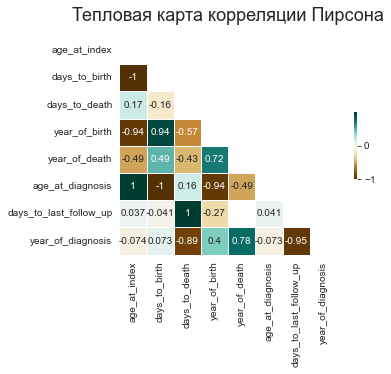

In [64]:
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(clinical_info.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    clinical_info.corr(numeric_only=True).round(4),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,

    mask=mask,
)

heatmap.set_title(
    "Тепловая карта корреляции Пирсона", fontdict={"fontsize": 18}, pad=16
);

Прямая корреляция: 

1:    age_at_diagnosis и age_at_index (неинформативно)

1:    days_to_last_follow_up и days_to_death (вероятно обследования учащаются перед датой смерти)

0,94: year_of_birth и days_to_birth (неинформативно)

0,78: year_of_diagnosis и year_of_death (в большинстве случаев диагноз ставят незадолго до смерти)

Обратная корреляция:

-1:    days_to_birth и age_at_index (неинформативно)

-1:    age_at_diagnosis и days_to_birth (неинформативно)

-0,95: year_of_diagnosis и days_to_last_follow_up(в последние года стали чаще проводить обследования)

-0,94: year_of_birth и age_at_index (неинформативно)

-0,94: age_at_diagnosis и year_of_birth (старикам ставят диагноз в конце жизни, средний возраст получает диагноз раньше приклонного возраста) 

-0,89: year_of_diagnosis и days_to_death(в последнее время умирают быстрее, после постановки диагноза)

## Категориальные признаки

In [65]:
clinical_info.describe(include='category')

,case_id,ethnicity,gender,race,vital_status,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,treatment_Radiation,treatment_Pharmaceutical
count,96,96,96,96,96,92,84,92,96,96,96,96,48,48
unique,48,2,2,3,2,2,4,2,10,2,20,20,3,3
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,not hispanic or latino,female,white,Alive,No,Stage II,No,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",No,Yes
freq,2,72,52,58,78,70,34,50,76,94,32,32,40,44


In [66]:
def show_cat_feat(feat, labels=None, title=None, aspect=1, pie=False, h=6, w=4):
    plt.figure(figsize=(h,w))

    print(f'Наличие пропусков: {clinical_info[feat].isna().any()}')

    if pie:
        clinical_info[feat].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True,
                                                            # labels=labels
                                                            ).set(title=title)

    sns.displot(data=clinical_info,
                x=clinical_info[feat],
                legend=True,
                aspect=aspect,
                hue=clinical_info['vital_status'],
                kind='hist').set(title=title)

## ethnicity (этническая принадлежность)

Наличие пропусков: False


<Figure size 432x288 with 0 Axes>

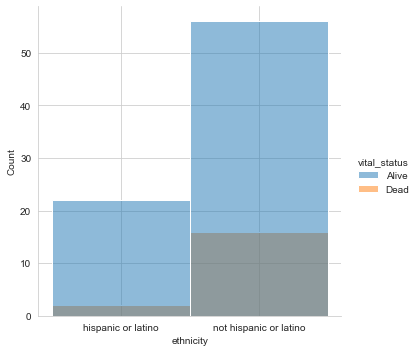

In [67]:
title = "Этническая принадлежность"

show_cat_feat('ethnicity', title)

## gender (пол)

Наличие пропусков: False


<Figure size 432x288 with 0 Axes>

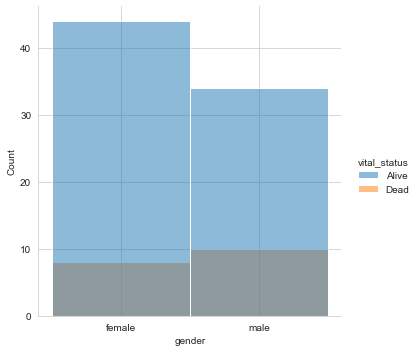

In [68]:
title = "Гендер"

show_cat_feat('gender', title)

In [69]:
gender = clinical_info.groupby(['gender', 'vital_status']).agg(Count=('gender', 'count'))
gender

Count
gender vital_status       
female Alive            44
       Dead              8
male   Alive            34
       Dead             10

Смертность мужчин выше.

## race (раса)

Наличие пропусков: False


<Figure size 432x288 with 0 Axes>

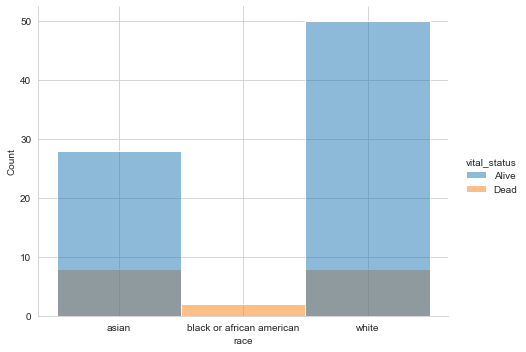

In [70]:
title = "Раса"

show_cat_feat('race', title, aspect=1.3)

## ann_arbor_b_symptoms (наличие симптомов по классификации Анн-Арбора)

Наличие пропусков: True


<Figure size 432x288 with 0 Axes>

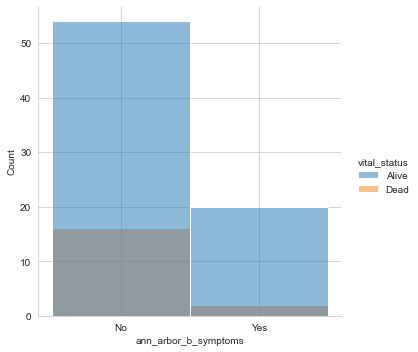

In [71]:
title = "Наличие симптомов по классификации Анн-Арбора"

show_cat_feat('ann_arbor_b_symptoms', title)

## ann_arbor_clinical_stage (клиническая стадия)

Наличие пропусков: True


<Figure size 720x576 with 0 Axes>

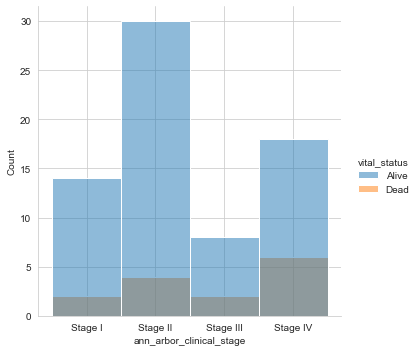

In [72]:
title = "Клиническая стадия"

show_cat_feat('ann_arbor_clinical_stage', title, h=10, w=8)

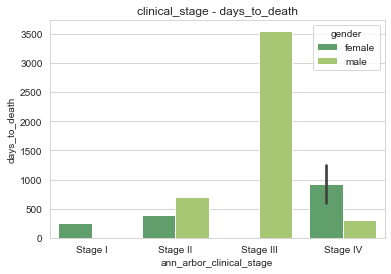

In [73]:
plt.figure(figsize=(6,4))

sns.barplot(x='ann_arbor_clinical_stage',
            y='days_to_death',
            hue='gender',
            data = clinical_info,
            palette='summer')
plt.title('clinical_stage - days_to_death')
plt.show();

Количество дней до смерти на третьей стадии существенно больше, чем на других стадиях.

## ann_arbor_extranodal_involvement (экстранодальное поражение)

Наличие пропусков: True


<Figure size 432x288 with 0 Axes>

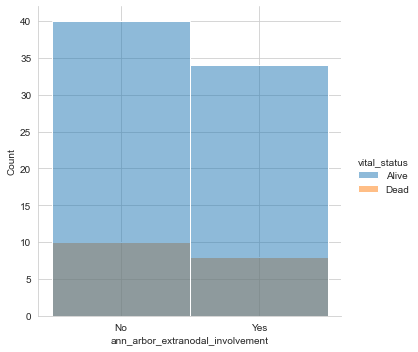

In [74]:
title = "Экстранодальное поражение"

show_cat_feat('ann_arbor_extranodal_involvement', title)

## icd_10_code (код Международной статистической классификации болезней)

Наличие пропусков: False


<Figure size 432x288 with 0 Axes>

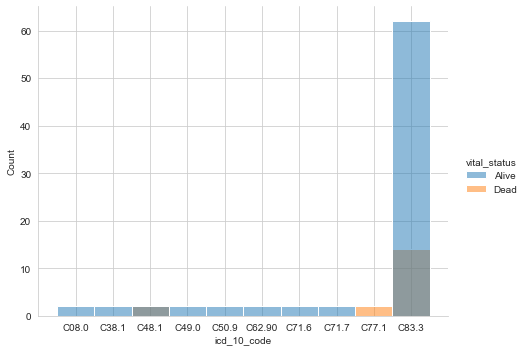

In [75]:
title = "Кодировка"

show_cat_feat('icd_10_code', title, aspect=1.3)

In [76]:
code = clinical_info.groupby(['icd_10_code', 'vital_status']).agg(Count=('icd_10_code', 'count'))
code

Count
icd_10_code vital_status       
C08.0       Alive             2
            Dead              0
C38.1       Alive             2
            Dead              0
C48.1       Alive             2
            Dead              2
C49.0       Alive             2
            Dead              0
C50.9       Alive             2
            Dead              0
C62.90      Alive             2
            Dead              0
C71.6       Alive             2
            Dead              0
C71.7       Alive             2
            Dead              0
C77.1       Alive             0
            Dead              2
C83.3       Alive            62
            Dead             14

Код C83.3 «Крупноклеточная (диффузная) неходжкинская лимфома»

## prior_treatment (предшествующее лечение)

Наличие пропусков: False


<Figure size 432x288 with 0 Axes>

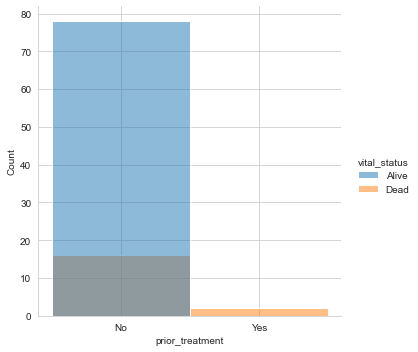

In [77]:
title = "Предшествующее лечение"

show_cat_feat('prior_treatment', title)

In [78]:
prior = clinical_info.groupby(['prior_treatment', 'vital_status']).agg(Count=('prior_treatment', 'count'))
prior

Count
prior_treatment vital_status       
No              Alive            78
                Dead             16
Yes             Alive             0
                Dead              2

## site_of_resection_or_biopsy (место резекции или биопсии)

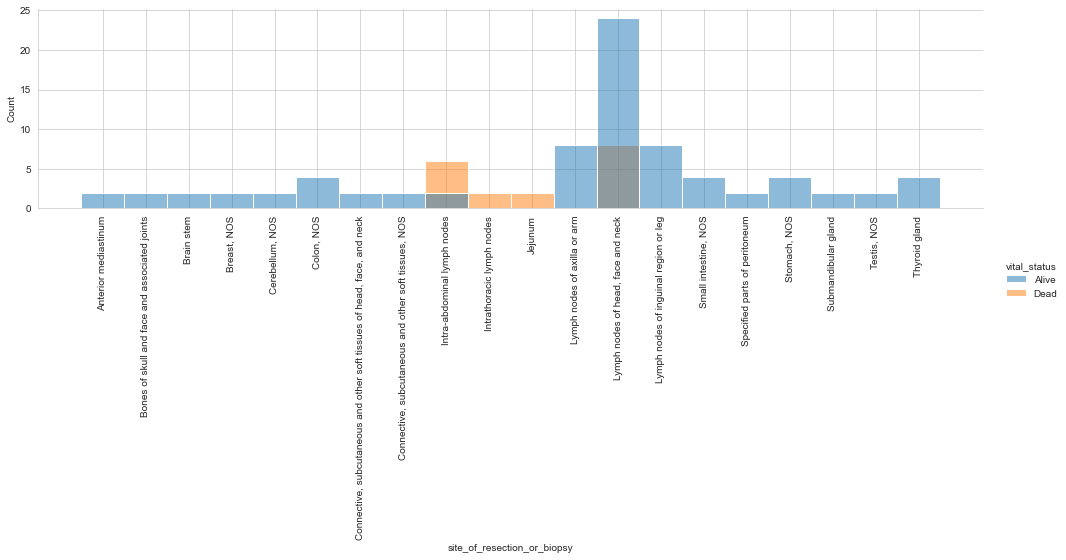

In [79]:
his = sns.displot(data=clinical_info,
                x=clinical_info['site_of_resection_or_biopsy'],
                legend=True,
                height=3.5,
                aspect=4,
                hue=clinical_info['vital_status'],
                kind='hist')
plt.xticks(rotation=90);

## tissue_or_organ_of_origin (ткань или орган происхождения)

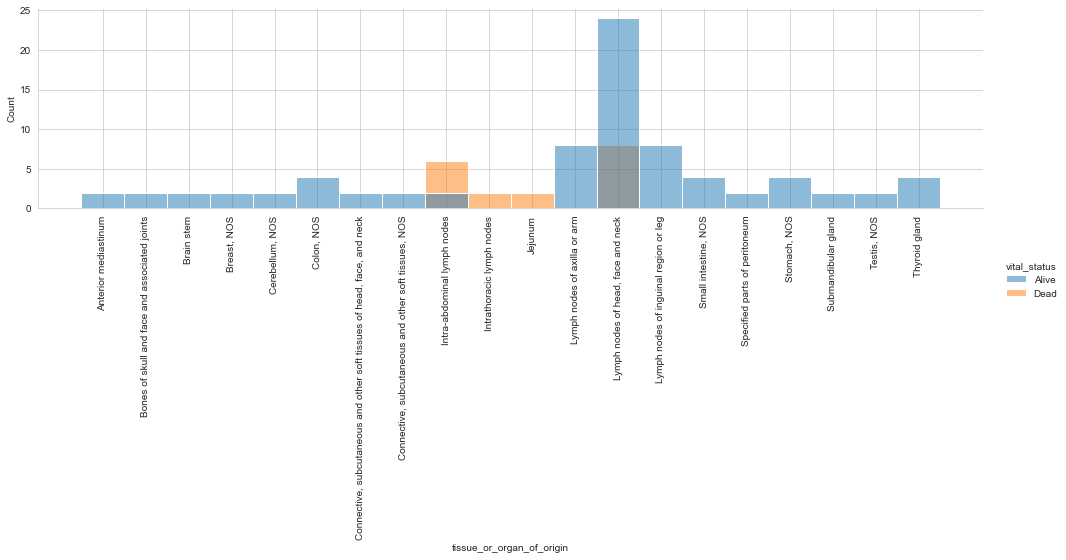

In [80]:
his = sns.displot(data=clinical_info,
                   x=clinical_info['tissue_or_organ_of_origin'],
                   legend=True,
                   height=3.5,
                   aspect=4,
                   hue=clinical_info['vital_status'],
                   kind='hist')
plt.xticks(rotation=90);

Повышенная смертность у людей с новообразованиями в внутрибрюшных лимфатических узлах, внутригрудных лимфатических узлах, в тонкой кишке.

## treatment_Radiation (лучевая терапия)

Наличие пропусков: True


<Figure size 432x288 with 0 Axes>

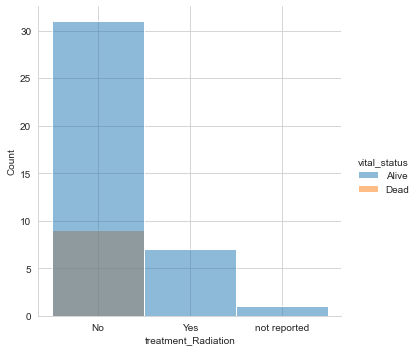

In [81]:
title = "Лучевая терапия"

show_cat_feat('treatment_Radiation', title, pie=False)

In [82]:
prior_t = clinical_info.groupby(['treatment_Radiation', 'vital_status']).agg(Count=('treatment_Radiation', 'count'))
prior_t

Count
treatment_Radiation vital_status       
No                  Alive            31
                    Dead              9
Yes                 Alive             7
                    Dead              0
not reported        Alive             1
                    Dead              0

## treatment_Pharmaceutical (фармацевтическое лечение)

Наличие пропусков: True


<Figure size 432x288 with 0 Axes>

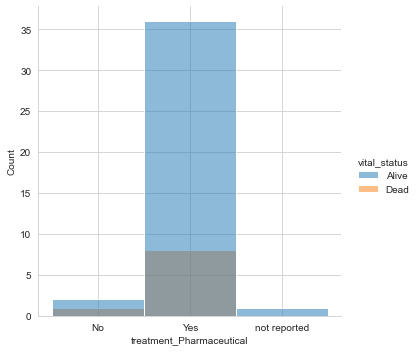

In [83]:
title = "Фармацевтическое лечение"

show_cat_feat('treatment_Pharmaceutical', title, pie=False)

In [84]:
prior_f = clinical_info.groupby(['treatment_Pharmaceutical', 'vital_status']).agg(Count=('treatment_Pharmaceutical', 'count'))
prior_f

Count
treatment_Pharmaceutical vital_status       
No                       Alive             2
                         Dead              1
Yes                      Alive            36
                         Dead              8
not reported             Alive             1
                         Dead              0

## V-мера Крамера

In [85]:
pip install association-metrics

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: association-metrics in c:\users\user\anaconda3\lib\site-packages (0.0.1)



In [86]:
import association_metrics as am

In [87]:
#cramersv = am.CramersV(clinical_info[categorical_features].drop('case_id', axis=1))
#cramersv.fit()

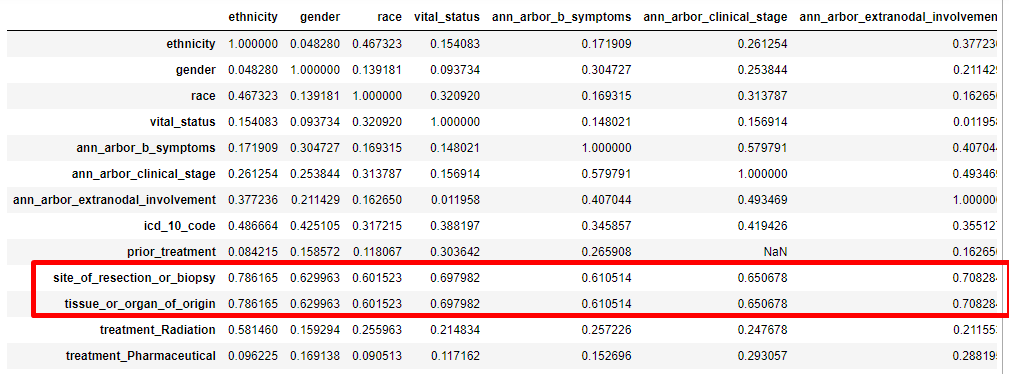

Не грузится V-мера Крамера в ноутбуке. Комментирую изображение.

Высокая корреляция наблюдается между icd_10_code и местом биопсии, органом происходжения.

Признаки места забора биопсии и органа происходжения образования имеют заметно большую корреляцию от остальных признаков.

vital_status в большей степени зависит от места забора биопсии и органа происходжения образования, а также от icd_10_code.

## Целевая переменная vital_status

[Text(0.5, 1.0, 'Жизненное состояние')]

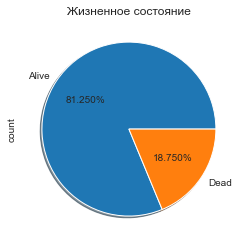

In [88]:
title = 'Жизненное состояние'
clinical_info['vital_status'].value_counts().plot.pie(autopct = '%1.3f%%', shadow=True,
                                                            # labels=labels
                                                            ).set(title=title)

## Таблица корреляции

In [89]:
import phik
from phik.report import plot_correlation_matrix

In [90]:
'''phik_overview = clinical_info.drop('case_id', axis=1).phik_matrix().round(2)

phik.report.plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()'''

'phik_overview = clinical_info.drop(\'case_id\', axis=1).phik_matrix().round(2)\n\nphik.report.plot_correlation_matrix(phik_overview.values,\n                        x_labels=phik_overview.columns,\n                        y_labels=phik_overview.index,\n                        vmin=0, vmax=1, color_map="Greens",\n                        title=r"correlation",\n                        fontsize_factor=0.8, figsize=(11, 6))\nplt.tight_layout()'

Таблица корреляции не грузится.

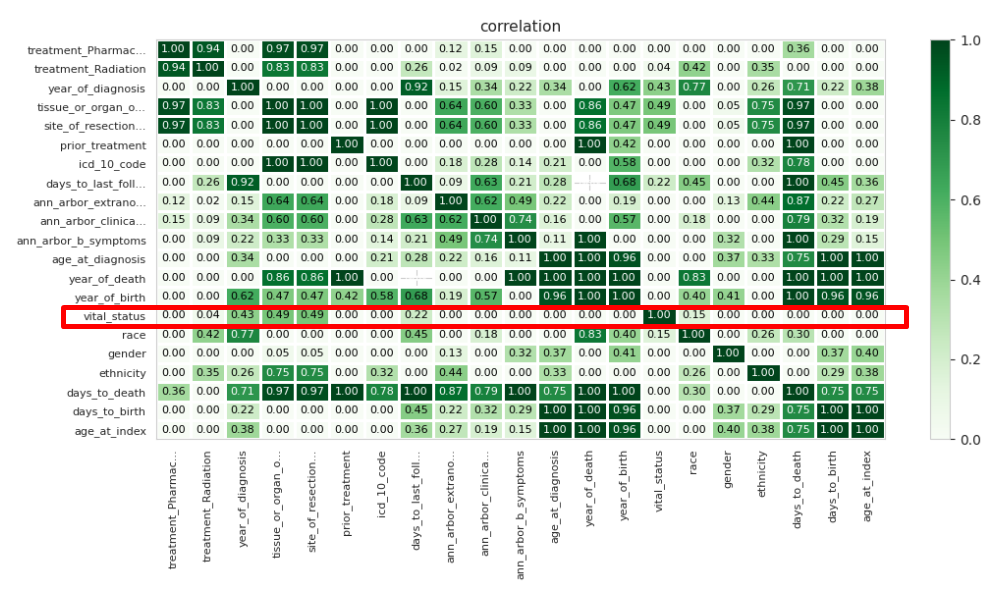

Наибольшая корреляция целевой переменной с признаками места забора биопсии и органа происхождения образования.

## ANOVA

In [91]:
from scipy.stats import f_oneway

In [92]:
Data = []

for c1 in clinical_info.columns:
    for c2 in clinical_info.columns:
        if clinical_info[c1].dtype == 'category' and clinical_info[c2].dtype != 'category':
            CategoryGroupLists = clinical_info.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists) #f-test

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes[AnovaRes['Category'] == 'vital_status']

,Category,Numerical,Is correlated
32,vital_status,age_at_index,No
33,vital_status,days_to_birth,No
34,vital_status,days_to_death,Yes
35,vital_status,year_of_birth,No
36,vital_status,year_of_death,Yes
37,vital_status,age_at_diagnosis,No
38,vital_status,days_to_last_follow_up,Yes
39,vital_status,year_of_diagnosis,Yes


По методике ANOVA для vital_status есть взаимосвязь с days_of_death, year_of_depth, days_to_last_follow_up.

In [93]:
vital = clinical_info.groupby(['site_of_resection_or_biopsy', 'vital_status']).agg(Count=('site_of_resection_or_biopsy', 'count'))
vital

Count
site_of_resection_or_biopsy                        vital_status       
Anterior mediastinum                               Alive             2
                                                   Dead              0
Bones of skull and face and associated joints      Alive             2
                                                   Dead              0
Brain stem                                         Alive             2
                                                   Dead              0
Breast, NOS                                        Alive             2
                                                   Dead              0
Cerebellum, NOS                                    Alive             2
                                                   Dead              0
Colon, NOS                                         Alive             4
                                                   Dead              0
Connective, subcutaneous and other soft tissues... Alive             2
                                                   Dead              0
Connective, subcutaneous and other soft tissues... Alive             2
                                                   Dead              0
Intra-abdominal lymph nodes                        Alive             2
                                                   Dead              6
Intrathoracic lymph nodes                          Alive             0
                                                   Dead              2
Jejunum                                            Alive             0
                                                   Dead              2
Lymph nodes of axilla or arm                       Alive             8
                                                   Dead              0
Lymph nodes of head, face and neck                 Alive            24
                                                   Dead              8
Lymph nodes of inguinal region or leg              Alive             8
                                                   Dead              0
Small intestine, NOS                               Alive             4
                                                   Dead              0
Specified parts of peritoneum                      Alive             2
                                                   Dead              0
Stomach, NOS                                       Alive             4
                                                   Dead              0
Submandibular gland                                Alive             2
                                                   Dead              0
Testis, NOS                                        Alive             2
                                                   Dead              0
Thyroid gland                                      Alive             4
                                                   Dead              0

In [94]:
vital_ = clinical_info.groupby(['tissue_or_organ_of_origin', 'vital_status']).agg(Count=('tissue_or_organ_of_origin', 'count'))
vital_

Count
tissue_or_organ_of_origin                          vital_status       
Anterior mediastinum                               Alive             2
                                                   Dead              0
Bones of skull and face and associated joints      Alive             2
                                                   Dead              0
Brain stem                                         Alive             2
                                                   Dead              0
Breast, NOS                                        Alive             2
                                                   Dead              0
Cerebellum, NOS                                    Alive             2
                                                   Dead              0
Colon, NOS                                         Alive             4
                                                   Dead              0
Connective, subcutaneous and other soft tissues... Alive             2
                                                   Dead              0
Connective, subcutaneous and other soft tissues... Alive             2
                                                   Dead              0
Intra-abdominal lymph nodes                        Alive             2
                                                   Dead              6
Intrathoracic lymph nodes                          Alive             0
                                                   Dead              2
Jejunum                                            Alive             0
                                                   Dead              2
Lymph nodes of axilla or arm                       Alive             8
                                                   Dead              0
Lymph nodes of head, face and neck                 Alive            24
                                                   Dead              8
Lymph nodes of inguinal region or leg              Alive             8
                                                   Dead              0
Small intestine, NOS                               Alive             4
                                                   Dead              0
Specified parts of peritoneum                      Alive             2
                                                   Dead              0
Stomach, NOS                                       Alive             4
                                                   Dead              0
Submandibular gland                                Alive             2
                                                   Dead              0
Testis, NOS                                        Alive             2
                                                   Dead              0
Thyroid gland                                      Alive             4
                                                   Dead              0

Выводы:

Наибольшая корреляция целевой переменной с признаками места забора биопсии и органа происхождения образования.

Повышенная смертность у людей с новообразованиями в внутрибрюшных лимфатических узлах, внутригрудных лимфатических узлах, в тонкой кишке.

Женщины, которым поставили диагноз от 40 до 50 лет умирают чаще, чем женщины более старшего возраста. От 50 до 60 шансы 50/50. После 60 - вылечиваются. Вероятно, потому что более молодые не проводят регулярную диагностику, чем женщины преклонного возраста.

У мужчин наоборот, умирают представители за 60 (шансы 50/50). До 60 - вылечиваются.

Женщины заболевают раньше по возрасту.